In [215]:
#import libraries
import os
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

<h3>UNZIP FILE</h3>

In [2]:
df_path = r'C:\Users\aa22788\Stress_dataset'
import zipfile
with zipfile.ZipFile(r'C:\Users\aa22788\Stress-Predict-Dataset', 'r') as zip_ref:
    zip_ref.extractall(df_path)

In [3]:
pwd

'C:\\Users\\aa22788'

<h3>List of all features we will collect</h3>

TEMP.csv
Data from temperature sensor expressed degrees on the Celsius (°C) scale.

EDA.csv
Data from the electrodermal activity sensor expressed as microsiemens (μS).

BVP.csv
Data from photoplethysmograph.

ACC.csv
Data from 3-axis accelerometer sensor. The accelerometer is configured to measure acceleration in the range [-2g, 2g]. Therefore the unit in this file is 1/64g.
Data from x, y, and z axis are respectively in first, second, and third column.

IBI.csv
Time between individuals heart beats extracted from the BVP signal.
The first column is the time (respect to the initial time) of the detected inter-beat interval expressed in seconds (s).
The second column is the duration in seconds (s) of the detected inter-beat interval (i.e., the distance in seconds from the previous beat).

HR.csv
Average heart rate extracted from the BVP signal.


CREATE empty lists to fetch in data for each participant feature 

In [139]:
acc =[]
acc_d = []
temp = []
eda = []
bvp = []
hr = []
ibi = []

acc2 =[]
acc_d2 = []
temp2 = []
eda2 = []
bvp2 = []
hr2 = []
ibi2 = []

acc4 =[]
acc_d4 = []
temp4 = []
eda4 = []
bvp4 = []
hr4 = []
ibi4 = []

acc6 =[]
acc_d6 = []
temp6 = []
eda6 = []
bvp6 = []
hr6 = []
ibi6 = []
# acc.to_csv('ACC.csv', mode='a', index=False, header=False)

### Import data for participant 01, 02, 04 and 06

Read in data for each column

In [140]:
df_file_path = r'C:\Users\aa22788\Stress_dataset'
for dirpath, dirname, filenames in os.walk(df_file_path):
    if dirpath == r'C:\Users\aa22788\Stress_dataset\S01':
        for file in filenames:
            #Append each excel file to its respective path, according to label
            if file =='ACC.csv':
                acc.append(pd.read_csv(dirpath+ '\\'+file,skiprows=2,  header=None) )
                acc_d.append(pd.read_csv(dirpath+ '\\'+file,nrows=2, header=None) )
                
            if file=='TEMP.csv':
                temp.append(pd.read_csv(dirpath+ '\\'+file,skiprows=2, header=None) )

            if file =='BVP.csv':
                bvp.append(pd.read_csv(dirpath+ '\\'+file,skiprows=2, header=None) )

            if file =='HR.csv':
                hr.append(pd.read_csv(dirpath+ '\\'+file,skiprows=2, header=None) )

            if file =='IBI.csv':
                ibi.append(pd.read_csv(dirpath+ '\\'+file,skiprows=2, header=None) )

            if file =='EDA.csv':
                eda.append(pd.read_csv(dirpath+ '\\'+file,skiprows=2, header=None) )

            print(dirpath, file+'lol')
    
    if dirpath == r'C:\Users\aa22788\Stress_dataset\S02':
        for file in filenames:
            #Append each excel file to its respective path, according to label
            if file =='ACC.csv':
                acc2.append(pd.read_csv(dirpath+ '\\'+file,skiprows=2,  header=None) )
                acc_d2.append(pd.read_csv(dirpath+ '\\'+file,nrows=2, header=None) )
                
            if file=='TEMP.csv':
                temp2.append(pd.read_csv(dirpath+ '\\'+file,skiprows=2, header=None) )

            if file =='BVP.csv':
                bvp2.append(pd.read_csv(dirpath+ '\\'+file,skiprows=2, header=None) )

            if file =='HR.csv':
                hr2.append(pd.read_csv(dirpath+ '\\'+file,skiprows=2, header=None) )

            if file =='IBI.csv':
                ibi2.append(pd.read_csv(dirpath+ '\\'+file,skiprows=2, header=None) )

            if file =='EDA.csv':
                eda2.append(pd.read_csv(dirpath+ '\\'+file,skiprows=2, header=None) )

            print(dirpath, file+'lol')
    
    if dirpath == r'C:\Users\aa22788\Stress_dataset\S04':
        for file in filenames:
            #Append each excel file to its respective path, according to label
            if file =='ACC.csv':
                acc4.append(pd.read_csv(dirpath+ '\\'+file,skiprows=2,  header=None) )
                acc_d4.append(pd.read_csv(dirpath+ '\\'+file,nrows=2, header=None) )
                
            if file=='TEMP.csv':
                temp4.append(pd.read_csv(dirpath+ '\\'+file,skiprows=2, header=None) )

            if file =='BVP.csv':
                bvp4.append(pd.read_csv(dirpath+ '\\'+file,skiprows=2, header=None) )

            if file =='HR.csv':
                hr4.append(pd.read_csv(dirpath+ '\\'+file,skiprows=2, header=None) )

            if file =='IBI.csv':
                ibi4.append(pd.read_csv(dirpath+ '\\'+file,skiprows=2, header=None) )

            if file =='EDA.csv':
                eda4.append(pd.read_csv(dirpath+ '\\'+file,skiprows=2, header=None) )

            print(dirpath, file+'lol')
    
    if dirpath == r'C:\Users\aa22788\Stress_dataset\S06':
        for file in filenames:
            #Append each excel file to its respective path, according to label
            if file =='ACC.csv':
                acc6.append(pd.read_csv(dirpath+ '\\'+file,skiprows=2,  header=None) )
                acc_d6.append(pd.read_csv(dirpath+ '\\'+file,nrows=2, header=None) )
                
            if file=='TEMP.csv':
                temp6.append(pd.read_csv(dirpath+ '\\'+file,skiprows=2, header=None) )

            if file =='BVP.csv':
                bvp6.append(pd.read_csv(dirpath+ '\\'+file,skiprows=2, header=None) )

            if file =='HR.csv':
                hr6.append(pd.read_csv(dirpath+ '\\'+file,skiprows=2, header=None) )

            if file =='IBI.csv':
                ibi6.append(pd.read_csv(dirpath+ '\\'+file,skiprows=2, header=None) )

            if file =='EDA.csv':
                eda6.append(pd.read_csv(dirpath+ '\\'+file,skiprows=2, header=None) )

            print(dirpath, file+'lol')
    
    
        #another layer to include data for 

C:\Users\aa22788\Stress_dataset\S06 ACC.csvlol
C:\Users\aa22788\Stress_dataset\S06 BVP.csvlol
C:\Users\aa22788\Stress_dataset\S06 EDA.csvlol
C:\Users\aa22788\Stress_dataset\S06 HR.csvlol
C:\Users\aa22788\Stress_dataset\S06 IBI.csvlol
C:\Users\aa22788\Stress_dataset\S06 info.txtlol
C:\Users\aa22788\Stress_dataset\S06 tags_S06.csvlol
C:\Users\aa22788\Stress_dataset\S06 TEMP.csvlol


<h3>concatenate the lists into dataframe for each signal and for each participant data</h3> 

### Participant 01

In [7]:

acc = pd.concat(acc)
acc.reset_index(inplace=True,drop=True)

acc_d = pd.concat(acc_d)
acc_d.reset_index(inplace=True,drop=True)

temp = pd.concat(temp)
temp.reset_index(inplace=True,drop=True)

bvp = pd.concat(bvp)
bvp.reset_index(inplace=True,drop=True)

hr = pd.concat(hr)
hr.reset_index(inplace=True,drop=True)

ibi = pd.concat(ibi)
ibi.reset_index(inplace=True,drop=True)

eda = pd.concat(eda)
eda.reset_index(inplace=True,drop=True)

### Participant 02

In [8]:
acc2 = pd.concat(acc2)
acc2.reset_index(inplace=True,drop=True)

acc_d2 = pd.concat(acc_d2)
acc_d2.reset_index(inplace=True,drop=True)

temp2 = pd.concat(temp2)
temp2.reset_index(inplace=True,drop=True)

bvp2 = pd.concat(bvp2)
bvp2.reset_index(inplace=True,drop=True)

hr2 = pd.concat(hr2)
hr2.reset_index(inplace=True,drop=True)

ibi2 = pd.concat(ibi2)
ibi2.reset_index(inplace=True,drop=True)

eda2 = pd.concat(eda2)
eda2.reset_index(inplace=True,drop=True)

### Participant 04

In [9]:
acc4 = pd.concat(acc4)
acc4.reset_index(inplace=True,drop=True)

acc_d4 = pd.concat(acc_d4)
acc_d4.reset_index(inplace=True,drop=True)

temp4 = pd.concat(temp4)
temp4.reset_index(inplace=True,drop=True)

bvp4 = pd.concat(bvp4)
bvp4.reset_index(inplace=True,drop=True)

hr4 = pd.concat(hr4)
hr4.reset_index(inplace=True,drop=True)

ibi4 = pd.concat(ibi4)
ibi4.reset_index(inplace=True,drop=True)

eda4 = pd.concat(eda4)
eda4.reset_index(inplace=True,drop=True)

### Participant 06

In [141]:
acc6 = pd.concat(acc6)
acc.reset_index(inplace=True,drop=True)

acc_d6 = pd.concat(acc_d6)
acc_d6.reset_index(inplace=True,drop=True)

temp6 = pd.concat(temp6)
temp6.reset_index(inplace=True,drop=True)

bvp6 = pd.concat(bvp6)
bvp6.reset_index(inplace=True,drop=True)

hr6 = pd.concat(hr6)
hr.reset_index(inplace=True,drop=True)

ibi6 = pd.concat(ibi6)
ibi6.reset_index(inplace=True,drop=True)

eda6 = pd.concat(eda6)
eda6.reset_index(inplace=True,drop=True)

In [11]:
#check if columns read in properly
print(acc.shape)
print(temp.head())
acc6.head()

(104310, 3)
       0
0  28.39
1  28.39
2  28.39
3  28.39
4  28.39


,0,1,2
0,-3,-1,-63
1,-3,-1,-63
2,-3,-1,-63
3,-3,-1,-62
4,-3,-1,-62


In [12]:
print(acc_d4.head())
acc_d6.head()

              0             1             2
0  1.644233e+09  1.644233e+09  1.644233e+09
1  3.200000e+01  3.200000e+01  3.200000e+01


,0,1,2
0,1.644832e+09,1.644832e+09,1.644832e+09
1,3.200000e+01,3.200000e+01,3.200000e+01


### Give descriptive names to each column for each participant

### Participant 01

In [13]:
ibi.rename(columns = {0:"ibi_1",1:"ibi_2"},inplace=True)
hr.rename(columns = {0:"avg_heart_rate"},inplace=True)
temp.rename(columns = {0:"temp"},inplace=True)
eda.rename(columns = {0:"eda"},inplace=True)
acc.rename(columns = {0:"acc_x",1:"acc_y",2:"acc_z"},inplace=True)
bvp.rename(columns = {0:"bvp"},inplace=True)

### Participant 02

In [14]:
ibi2.rename(columns = {0:"ibi_1",1:"ibi_2"},inplace=True)
hr2.rename(columns = {0:"avg_heart_rate"},inplace=True)
temp2.rename(columns = {0:"temp"},inplace=True)
eda2.rename(columns = {0:"eda"},inplace=True)
acc2.rename(columns = {0:"acc_x",1:"acc_y",2:"acc_z"},inplace=True)
bvp2.rename(columns = {0:"bvp"},inplace=True)

### Participant 04

In [15]:
ibi4.rename(columns = {0:"ibi_1",1:"ibi_2"},inplace=True)
hr4.rename(columns = {0:"avg_heart_rate"},inplace=True)
temp4.rename(columns = {0:"temp"},inplace=True)
eda4.rename(columns = {0:"eda"},inplace=True)
acc4.rename(columns = {0:"acc_x",1:"acc_y",2:"acc_z"},inplace=True)
bvp4.rename(columns = {0:"bvp"},inplace=True)

### Participant 06

In [142]:
ibi6.rename(columns = {0:"ibi_1",1:"ibi_2"},inplace=True)
hr6.rename(columns = {0:"avg_heart_rate"},inplace=True)
temp6.rename(columns = {0:"temp"},inplace=True)
eda6.rename(columns = {0:"eda"},inplace=True)
acc6.rename(columns = {0:"acc_x",1:"acc_y",2:"acc_z"},inplace=True)
bvp6.rename(columns = {0:"bvp"},inplace=True)

### Append timeseries to acc dataframe for each participant in the study

In [143]:
#Participant 01
acc['datetime']= datetime.utcfromtimestamp(acc_d.iloc[0,1])
sample_rate = acc_d.iloc[1,1]
for i,j in acc.iterrows():
    acc['datetime'].iloc[i] = acc['datetime'].iloc[i] + timedelta(seconds = i*(1/sample_rate))

    
#participant 02
acc2['datetime']= datetime.utcfromtimestamp(acc_d2.iloc[0,1])
sample_rate2 = acc_d2.iloc[1,1]
for i,j in acc2.iterrows():
    acc2['datetime'].iloc[i] = acc2['datetime'].iloc[i] + timedelta(seconds = i*(1/sample_rate2))

    
#participant 04
acc4['datetime']= datetime.utcfromtimestamp(acc_d4.iloc[0,1])
sample_rate4 = acc_d4.iloc[1,1]
for i,j in acc4.iterrows():
    acc4['datetime'].iloc[i] = acc4['datetime'].iloc[i] + timedelta(seconds = i*(1/sample_rate4))
    
#participant 06
acc6['datetime']= datetime.utcfromtimestamp(acc_d6.iloc[0,1])
sample_rate6 = acc_d6.iloc[1,1]
for i,j in acc6.iterrows():
    acc6['datetime'].iloc[i] = acc6['datetime'].iloc[i] + timedelta(seconds = i*(1/sample_rate6))
    

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [19]:
acc.head()

,acc_x,acc_y,acc_z,datetime
0,-2,43,43,2022-02-07 09:27:41.000000
1,-2,44,46,2022-02-07 09:27:41.031250
2,2,44,47,2022-02-07 09:27:41.062500
3,3,43,44,2022-02-07 09:27:41.093750
4,1,43,45,2022-02-07 09:27:41.125000


In [20]:
acc6.head()

,acc_x,acc_y,acc_z,datetime
0,-3,-1,-63,2022-02-14 09:45:00.000000
1,-3,-1,-63,2022-02-14 09:45:00.031250
2,-3,-1,-63,2022-02-14 09:45:00.062500
3,-3,-1,-62,2022-02-14 09:45:00.093750
4,-3,-1,-62,2022-02-14 09:45:00.125000


### Concatenate all dataframes as columns for each participant

In [21]:
#Participant 01
frames = [acc, temp, bvp, hr, ibi, eda]
df = pd.concat(frames, axis=1, join="outer")


In [22]:
#Participant 02
frames2 = [acc2, temp2, bvp2, hr2, ibi2, eda2]
df2 = pd.concat(frames2, axis=1, join="outer")


In [23]:
#Participant 04
frames4 = [acc4, temp4, bvp4, hr4, ibi4, eda4]
df4 = pd.concat(frames4, axis=1, join="outer")


In [144]:
#Participant 06
frames6 = [acc6, temp6, bvp6, hr6, ibi6, eda6]
df6 = pd.concat(frames6, axis=1, join="outer")


In [145]:
print(df.head())
print(df2.head())
df6.head()

                            acc_x  acc_y  acc_z                   datetime  \
datetime                                                                     
2022-02-07 09:29:00.000000  -15.0   17.0   59.0 2022-02-07 09:29:00.000000   
2022-02-07 09:29:00.031250  -15.0   16.0   59.0 2022-02-07 09:29:00.031250   
2022-02-07 09:29:00.062500  -15.0   16.0   60.0 2022-02-07 09:29:00.062500   
2022-02-07 09:29:00.093750  -16.0   16.0   59.0 2022-02-07 09:29:00.093750   
2022-02-07 09:29:00.125000  -14.0   16.0   60.0 2022-02-07 09:29:00.125000   

                            average_hr  new_temp  new_bvp   new_eda  label  
datetime                                                                    
2022-02-07 09:29:00.000000       74.35     28.53   -11.51  0.189626      1  
2022-02-07 09:29:00.031250       74.35     28.53   -14.13  0.189626      1  
2022-02-07 09:29:00.062500       74.35     28.53   -15.54  0.189626      1  
2022-02-07 09:29:00.093750       74.35     28.53   -17.44  0.189626 

,acc_x,acc_y,acc_z,datetime,temp,bvp,avg_heart_rate,ibi_1,ibi_2,eda
0,-3.0,-1.0,-63.0,2022-02-14 09:45:00.000000,27.73,-0.0,58.00,16.765625,0.812500,0.000000
1,-3.0,-1.0,-63.0,2022-02-14 09:45:00.031250,27.73,-0.0,61.00,17.562500,0.796875,0.105069
2,-3.0,-1.0,-63.0,2022-02-14 09:45:00.062500,27.73,-0.0,61.67,18.375000,0.812500,0.144790
3,-3.0,-1.0,-62.0,2022-02-14 09:45:00.093750,27.73,-0.0,62.75,19.156250,0.781250,0.142228
4,-3.0,-1.0,-62.0,2022-02-14 09:45:00.125000,27.73,-0.0,63.40,19.937500,0.781250,0.142228


### Get the right data for each column, for all participants
We obtained our datetime column by obtaining samples from the accelerometer, its sample rate is 32, we have to adjust other columns to reflect this:

- For heart rate 'hr': every 32 rows represent a single value because it's sample rate is 1
- For bvp: Every 2 values represent a single row because its sample rate is 64
- For temperature "temp": every 8 rows represent a single value because it's sample rate is 4
- For electrodermal activity "eda": every 8 rows represent a single value because it's sample rate is 4

#### Participant 01

In [26]:
df['average_hr'] = np.NaN
list_hr1 = []
counter = 0
df_loc10 = df.iloc[320:,:] # for participant 01, heart rate count starts 10 seconds after acc starts, which 320 rows
#iterate through each heart rate sample
for row in hr['avg_heart_rate']:
    for index in df_loc10.index:
        if counter <=31: #sample 
            list_hr1.append(row)
            counter+=1
            continue
        else:
            counter = 0
            break
        break
        
        
list_temp1 = []
counter = 0 
for row in temp['temp']:
    for index in df.index:
        if counter <= 7:
            list_temp1.append(row)
            counter+=1
            continue
        else:
            counter = 0
            break
        break

        
list_eda1 = []
counter = 0 
for row in eda['eda']:
    for index in df.index:
        if counter <= 7:
            list_eda1.append(row)
            counter+=1
            continue
        else:
            counter = 0
            break
        break

even_rows = bvp.iloc[::2]
list_bvp1 = []
num = 0
for row in even_rows['bvp']:
        list_bvp1.append(row)
        
    
        

#### Participant 02

In [27]:
df2['average_hr'] = np.NaN
list_hr2 = []
counter2 = 0
df2_loc10 = df2.iloc[320:,:] # for participant 02, heart rate count starts 10 seconds after acc starts, which 320 rows
#iterate through each heart rate sample
for row in hr2['avg_heart_rate']:
    for index in df2_loc10.index:
        if counter2 <=31: #sample 
            
            
            list_hr2.append(row)
            counter2+=1
            continue
        else:
            counter2 = 0
            break
        break

                
list_temp2 = []
counter2 = 0 
for row in temp2['temp']:
    for index in df2.index:
        if counter2 <= 7:
            list_temp2.append(row)
            counter2+=1
            continue
        else:
            counter2 = 0
            break
        break

        
list_eda2 = []
counter2 = 0 
for row in eda2['eda']:
    for index in df2.index:
        if counter2 <= 7:
            list_eda2.append(row)
            counter2+=1
            continue
        else:
            counter2 = 0
            break
        break

even_rows2 = bvp2.iloc[::2]
list_bvp2 = []
num2 = 0
for row in even_rows2['bvp']:
        list_bvp2.append(row)
        
    

#### Participant 04

In [28]:
df4['average_hr'] = np.NaN
list_hr4 = []
counter4 = 0
df4_loc10 = df4.iloc[320:,:] # for participant 04, heart rate count starts 10 seconds after acc starts, which 320 rows
#iterate through each heart rate sample
for row in hr4['avg_heart_rate']:
    for index in df4_loc10.index:
        if counter4 <=31: #sample 
            
            
            list_hr4.append(row)
            counter4+=1
            continue
        else:
            counter4 = 0
            break
        break

                
list_temp4 = []
counter4 = 0 
for row in temp4['temp']:
    for index in df4.index:
        if counter4 <= 7:
            list_temp4.append(row)
            counter4+=1
            continue
        else:
            counter4 = 0
            break
        break

        
list_eda4 = []
counter4 = 0 
for row in eda4['eda']:
    for index in df4.index:
        if counter4 <= 7:
            list_eda4.append(row)
            counter4+=1
            continue
        else:
            counter4 = 0
            break
        break

even_rows4 = bvp4.iloc[::2]
list_bvp4 = []
num4 = 0
for row in even_rows4['bvp']:
        list_bvp4.append(row)
        
    

#### Participant 06

In [146]:
df6['average_hr'] = np.NaN
list_hr6 = []
counter6 = 0
df6_loc10 = df6.iloc[320:,:] # for participant 06, heart rate count starts 10 seconds after acc starts, which is 320 rows 
#iterate through each heart rate sample
for row in hr6['avg_heart_rate']:
    for index in df6_loc10.index:
        if counter6 <=31: #sample 
            
            
            list_hr6.append(row)
            counter6+=1
            continue
        else:
            counter6 = 0
            break
        break

                
list_temp6 = []
counter6 = 0 
for row in temp6['temp']:
    for index in df6.index:
        if counter6 <= 7:
            list_temp6.append(row)
            counter6+=1
            continue
        else:
            counter6 = 0
            break
        break

        
list_eda6 = []
counter6 = 0 
for row in eda6['eda']:
    for index in df6.index:
        if counter6 <= 7:
            list_eda6.append(row)
            counter6+=1
            continue
        else:
            counter6 = 0
            break
        break

even_rows6 = bvp6.iloc[::2]
list_bvp6 = []
num6 = 0
for row in even_rows6['bvp']:
        list_bvp6.append(row)
        
    

Append the lists to each participants respective dataframe

In [30]:
len(list_hr1[:len(df)-320])
# len(df.loc[320:len(), 'average_hr'])
len(df.loc[320:len(list_hr1), 'average_hr'])

103681

In [147]:

df.loc[320:len(list_hr1)+319, 'average_hr'] = list_hr1
df2.loc[320:len(list_hr2)+319, 'average_hr'] = list_hr2
df4.loc[320:len(list_hr4)+319, 'average_hr'] = list_hr4
df6.loc[320:len(list_hr6)+319, 'average_hr'] = list_hr6

df.loc[:len(list_temp1)-1,'new_temp'] = list_temp1
df2.loc[:len(list_temp2)-1,'new_temp'] = list_temp2
df4.loc[:len(list_temp4)-1,'new_temp'] = list_temp4
df6.loc[:len(list_temp6)-1,'new_temp'] = list_temp6

df.loc[:len(list_bvp1)-1,'new_bvp'] = list_bvp1
df2.loc[:len(list_bvp2)-1,'new_bvp'] = list_bvp2
df4.loc[:len(list_bvp4)-1,'new_bvp'] = list_bvp4
df6.loc[:len(list_bvp6)-1,'new_bvp'] = list_bvp6

df.loc[:len(list_eda1)-1,'new_eda'] = list_eda1
df2.loc[:len(list_eda2)-1,'new_eda'] = list_eda2
df4.loc[:len(list_eda4)-1,'new_eda'] = list_eda4
df6.loc[:len(list_eda6)-1,'new_eda'] = list_eda6

In [148]:
df6.head()

,acc_x,acc_y,acc_z,datetime,temp,bvp,avg_heart_rate,ibi_1,ibi_2,eda,average_hr,new_temp,new_bvp,new_eda
0,-3.0,-1.0,-63.0,2022-02-14 09:45:00.000000,27.73,-0.0,58.00,16.765625,0.812500,0.000000,NaN,27.73,-0.0,0.0
1,-3.0,-1.0,-63.0,2022-02-14 09:45:00.031250,27.73,-0.0,61.00,17.562500,0.796875,0.105069,NaN,27.73,-0.0,0.0
2,-3.0,-1.0,-63.0,2022-02-14 09:45:00.062500,27.73,-0.0,61.67,18.375000,0.812500,0.144790,NaN,27.73,-0.0,0.0
3,-3.0,-1.0,-62.0,2022-02-14 09:45:00.093750,27.73,-0.0,62.75,19.156250,0.781250,0.142228,NaN,27.73,-0.0,0.0
4,-3.0,-1.0,-62.0,2022-02-14 09:45:00.125000,27.73,-0.0,63.40,19.937500,0.781250,0.142228,NaN,27.73,-0.0,0.0


### Create our label from the questionnaire time logs for each participant
column 'label' has two values, 1 if participant is stressed at a moment of time and 0 if not stressed

#### Participant 01

In [55]:
#initialise the label column
df['label']=np.NaN

#set datetime column as index, inorder to select the time period we need
df.set_index(df['datetime'],inplace=True)

#create a dataframe of rows that fall in the period of stress 
df_t1 = df.between_time('09:29', '09:34', include_start=True,include_end=True)
df_t2 = df.between_time('09:44', '09:54', include_start=True,include_end=True)
df_t3 = df.between_time('10:00', '10:02', include_start=True,include_end=True)


frames = [df_t1,df_t2,df_t3]
result = pd.concat(frames)
#iterate through the new dataframe to update the label column value. 
for index in result.index:
    df.loc[index,'label'] = 1
    
#create a dataframe of rows that fall in the period of rest 
df_t1 = df.between_time('09:34', '09:39', include_start=False,include_end=True)
df_t2 = df.between_time('09:54', '09:59', include_start=False,include_end=True)
df_t3 = df.between_time('10:02', '10:22', include_start=False,include_end=True)


frames_ = [df_t1,df_t2,df_t3]
result_ = pd.concat(frames_)
#iterate through the new dataframe to update the label column value. 
for index in result_.index:
    df.loc[index,'label'] = 0
    
df['label'].value_counts()

0.0    57600
1.0    32643
Name: label, dtype: int64

#### Participant 02

In [56]:
#initialise the label column
df2['label']=np.NaN

#set datetime column as index, inorder to select the time period we need
df2.set_index(df2['datetime'],inplace=True)

#create a dataframe of rows that fall in the period of stress 
df2_t1 = df2.between_time('10:03', '10:08', include_start=True,include_end=True)
df2_t2 = df2.between_time('10:13', '10:24', include_start=True,include_end=True)
df2_t3 = df2.between_time('10:29', '10:31', include_start=True,include_end=True)


frames2 = [df2_t1,df2_t2,df2_t3]
result2 = pd.concat(frames2)
#iterate through the new dataframe to update the label column value. 
for index in result2.index:
    df2.loc[index,'label'] = 1
    
#create a dataframe of rows that fall in the period of rest 
df2_t1 = df2.between_time('10:08', '10:13', include_start=False,include_end=True)
df2_t2 = df2.between_time('10:24', '10:29', include_start=False,include_end=True)
df2_t3 = df2.between_time('10:31', '10:51', include_start=False,include_end=True)


frames2_ = [df2_t1,df2_t2,df2_t3]
result2_ = pd.concat(frames2_)
#iterate through the new dataframe to update the label column value. 
for index in result2_.index:
    df2.loc[index,'label'] = 0


df2['label'].value_counts()

0.0    57600
1.0    34561
Name: label, dtype: int64

#### Participant 04

In [57]:
#initialise the label column
df4['label']=np.NaN

#set datetime column as index, inorder to select the time period we need
df4.set_index(df4['datetime'],inplace=True)

#create a dataframe of rows that fall in the period of stress 
df4_t1 = df4.between_time('11:40', '11:45', include_start=True,include_end=True)
df4_t2 = df4.between_time('11:50', '12:00', include_start=True,include_end=True)
df4_t3 = df4.between_time('12:05', '12:07', include_start=True,include_end=True)


frames4 = [df4_t1,df4_t2,df4_t3]
result4 = pd.concat(frames4)
#iterate through the new dataframe to update the label column value. 
for index in result4.index:
    df4.loc[index,'label'] = 1
    
#create a dataframe of rows that fall in the period of rest 
df4_t1 = df4.between_time('11:45', '11:50', include_start=False,include_end=True)
df4_t2 = df4.between_time('12:00', '12:05', include_start=False,include_end=True)
df4_t3 = df4.between_time('12:07', '12:28', include_start=False,include_end=True)


frames4_ = [df4_t1,df4_t2,df4_t3]
result4_ = pd.concat(frames4_)
#iterate through the new dataframe to update the label column value. 
for index in result4_.index:
    df4.loc[index,'label'] = 0


df4['label'].value_counts()

0.0    59520
1.0    32641
Name: label, dtype: int64

#### Participant 06

In [149]:
#initialise the label column
df6['label']=np.NaN

#set datetime column as index, inorder to select the time period we need
df6.set_index(df6['datetime'],inplace=True)

#create a dataframe of rows that fall in the period of stress 
df6_t1 = df6.between_time('09:55', '10:01', include_start=True,include_end=True)
df6_t2 = df6.between_time('10:07', '10:18', include_start=False,include_end=True)
df6_t3 = df6.between_time('10:23', '10:25', include_start=True,include_end=True)


frames6 = [df6_t1,df6_t2,df6_t3]
result6 = pd.concat(frames6)
#iterate through the new dataframe to update the label column value. 
for index in result6.index:
    df6.loc[index,'label'] = 1
    
#create a dataframe of rows that fall in the period of rest 
df6_t1 = df6.between_time('10:02', '10:07', include_start=False,include_end=True)
df6_t2 = df6.between_time('10:18', '10:23', include_start=False,include_end=True)
df6_t3 = df6.between_time('10:25', '10:40', include_start=False,include_end=True)


frames6_ = [df6_t1,df6_t2,df6_t3]
result6_ = pd.concat(frames6_)
#iterate through the new dataframe to update the label column value. 
for index in result6_.index:
    df6.loc[index,'label'] = 0


df6['label'].value_counts()

0.0    48000
1.0    36481
Name: label, dtype: int64

# Data Cleaning

Check if data is clean

In [67]:
df.reset_index(inplace=True,drop=True)
df.head()

,acc_x,acc_y,acc_z,datetime,temp,bvp,avg_heart_rate,ibi_1,ibi_2,eda,average_hr,new_temp,new_bvp,new_eda,label
0,-2.0,43.0,43.0,2022-02-07 09:27:41.000000,28.39,0.0,83.00,36.343750,0.859375,0.000000,NaN,28.39,0.0,0.0,NaN
1,-2.0,44.0,46.0,2022-02-07 09:27:41.031250,28.39,0.0,83.00,37.296875,0.953125,0.112750,NaN,28.39,0.0,0.0,NaN
2,2.0,44.0,47.0,2022-02-07 09:27:41.062500,28.39,0.0,72.67,38.187500,0.890625,0.166563,NaN,28.39,0.0,0.0,NaN
3,3.0,43.0,44.0,2022-02-07 09:27:41.093750,28.39,0.0,87.00,39.046875,0.859375,0.167844,NaN,28.39,0.0,0.0,NaN
4,1.0,43.0,45.0,2022-02-07 09:27:41.125000,28.39,0.0,80.00,39.859375,0.812500,0.167844,NaN,28.39,0.0,0.0,NaN


In [66]:
df2.reset_index(inplace=True,drop=True)
df2.head()

,acc_x,acc_y,acc_z,datetime,temp,bvp,avg_heart_rate,ibi_1,ibi_2,eda,average_hr,new_temp,new_bvp,new_eda,label
0,2.0,10.0,63.0,2022-02-07 09:52:54.000000,34.79,-0.0,118.00,604.937500,0.937500,0.000000,NaN,34.79,-0.0,0.0,NaN
1,4.0,12.0,66.0,2022-02-07 09:52:54.031250,34.79,-0.0,113.50,605.687500,0.750000,0.622764,NaN,34.79,-0.0,0.0,NaN
2,-1.0,13.0,63.0,2022-02-07 09:52:54.062500,34.79,-0.0,93.00,609.562500,0.859375,0.759875,NaN,34.79,-0.0,0.0,NaN
3,-7.0,11.0,59.0,2022-02-07 09:52:54.093750,34.79,-0.0,93.25,644.765625,0.875000,0.883157,NaN,34.79,-0.0,0.0,NaN
4,-7.0,6.0,57.0,2022-02-07 09:52:54.125000,34.79,-0.0,86.40,645.640625,0.875000,0.646097,NaN,34.79,-0.0,0.0,NaN


In [65]:
df4.reset_index(inplace=True,drop=True)
df4.head()

,acc_x,acc_y,acc_z,datetime,temp,bvp,avg_heart_rate,ibi_1,ibi_2,eda,average_hr,new_temp,new_bvp,new_eda,label
0,-23.0,7.0,59.0,2022-02-07 11:29:49.000000,33.99,-0.0,83.00,21.406250,0.750000,0.000000,NaN,33.99,-0.0,0.0,NaN
1,-23.0,7.0,59.0,2022-02-07 11:29:49.031250,33.99,-0.0,83.00,22.140625,0.734375,0.831534,NaN,33.99,-0.0,0.0,NaN
2,-23.0,7.0,59.0,2022-02-07 11:29:49.062500,33.99,-0.0,75.33,22.843750,0.703125,1.177739,NaN,33.99,-0.0,0.0,NaN
3,-23.0,7.0,59.0,2022-02-07 11:29:49.093750,33.99,-0.0,70.50,23.546875,0.703125,1.008683,NaN,33.99,-0.0,0.0,NaN
4,-22.0,7.0,59.0,2022-02-07 11:29:49.125000,33.99,-0.0,67.40,24.250000,0.703125,1.006120,NaN,33.99,-0.0,0.0,NaN


In [150]:
df6.reset_index(inplace=True,drop=True)
df6.head()

,acc_x,acc_y,acc_z,datetime,temp,bvp,avg_heart_rate,ibi_1,ibi_2,eda,average_hr,new_temp,new_bvp,new_eda,label
0,-3.0,-1.0,-63.0,2022-02-14 09:45:00.000000,27.73,-0.0,58.00,16.765625,0.812500,0.000000,NaN,27.73,-0.0,0.0,NaN
1,-3.0,-1.0,-63.0,2022-02-14 09:45:00.031250,27.73,-0.0,61.00,17.562500,0.796875,0.105069,NaN,27.73,-0.0,0.0,NaN
2,-3.0,-1.0,-63.0,2022-02-14 09:45:00.062500,27.73,-0.0,61.67,18.375000,0.812500,0.144790,NaN,27.73,-0.0,0.0,NaN
3,-3.0,-1.0,-62.0,2022-02-14 09:45:00.093750,27.73,-0.0,62.75,19.156250,0.781250,0.142228,NaN,27.73,-0.0,0.0,NaN
4,-3.0,-1.0,-62.0,2022-02-14 09:45:00.125000,27.73,-0.0,63.40,19.937500,0.781250,0.142228,NaN,27.73,-0.0,0.0,NaN


1st, we'll remove the wrong columns for each dataset
   


In [151]:
df.drop(columns=['temp','bvp','avg_heart_rate','eda'],inplace=True)
df2.drop(columns=['temp','bvp','avg_heart_rate','eda'],inplace=True)
df4.drop(columns=['temp','bvp','avg_heart_rate','eda'],inplace=True)
df6.drop(columns=['temp','bvp','avg_heart_rate','eda'],inplace=True)

2nd, we'll remove rows in which the column 'label'  is NaN, because they won't be useful for our modelling


In [69]:
df.shape

(208703, 11)

In [152]:
df = df.dropna(subset = ['label'])
df2 = df2.dropna(subset = ['label'])
df4 = df4.dropna(subset = ['label'])
df6 = df6.dropna(subset = ['label'])

In [153]:
df6.shape


(84481, 11)

Check if there are na values amongst our columns

3rd, drop the ibi column

In [154]:
# df.drop(columns=['ibi_1','ibi_2'],inplace=True)
# df2.drop(columns=['ibi_1','ibi_2'],inplace=True)
# df4.drop(columns=['ibi_1','ibi_2'],inplace=True)
df6.drop(columns=['ibi_1','ibi_2'],inplace=True)

In [157]:
df6.to_csv('df6.csv', index=False)
# df = pd.read_csv('df.csv')
# df2 = pd.read_csv('df2.csv')
# df4 = pd.read_csv('df4.csv')
# df6 = pd.read_csv('df6.csv')


In [115]:
print(df.isna().sum())
print(df2.isna().sum())
print(df4.isna().sum())
print(df6.isna().sum())

acc_x          0
acc_y          0
acc_z          0
datetime       0
average_hr     0
new_temp       0
new_bvp        0
new_eda       33
label          0
dtype: int64
acc_x         0
acc_y         0
acc_z         0
datetime      0
average_hr    0
new_temp      0
new_bvp       0
new_eda       0
label         0
dtype: int64
acc_x         0
acc_y         0
acc_z         0
datetime      0
average_hr    0
new_temp      0
new_bvp       0
new_eda       0
label         0
dtype: int64
acc_x         0
acc_y         0
acc_z         0
datetime      0
average_hr    0
new_temp      0
new_bvp       0
new_eda       0
label         0
dtype: int64


5th, From the results above, we see that only the column 'eda' for participant 01 has missing values, we'll deal with this using using median imputation.

The number is signficantly small enough to use a median imputation without introducing much bias to the data

In [116]:
df = df.fillna(df.median())


6th, change the datatype of column 'label' to integer

In [167]:
df['label'] = df['label'].astype('int')
df2['label'] = df2['label'].astype('int')
df4['label'] = df4['label'].astype('int')
df6['label'] = df6['label'].astype('int')

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
df2['datetime'] = pd.to_datetime(df2['datetime'])
df4['datetime'] = pd.to_datetime(df4['datetime'])
df6['datetime'] = pd.to_datetime(df6['datetime'])


In [ ]:
df.head()

# Data Exploration

## Time series plot

In [161]:
df.set_index(df['datetime'],inplace=True)
df2.set_index(df2['datetime'],inplace=True)
df4.set_index(df4['datetime'],inplace=True)
df6.set_index(df6['datetime'],inplace=True)

<AxesSubplot:xlabel='datetime', ylabel='average_hr'>

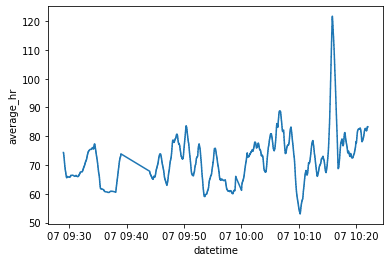

In [129]:
sns.lineplot(x=df.index, y='average_hr', data=df)

<AxesSubplot:xlabel='datetime', ylabel='average_hr'>

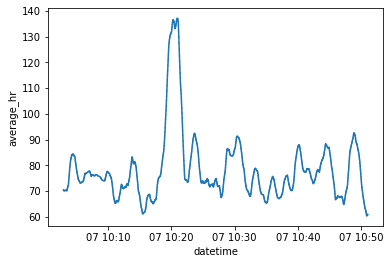

In [130]:
sns.lineplot(x=df2.index, y='average_hr', data=df2)

<AxesSubplot:xlabel='datetime', ylabel='average_hr'>

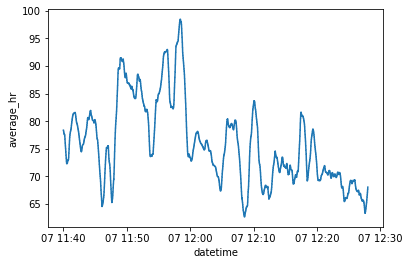

In [131]:
sns.lineplot(x=df4.index, y='average_hr', data=df4)

From the time series plots above, we observe that for periods of rest, the hearbeat is low and for periods of high stress activity, the heartbeat spikes up

In [160]:
df4.head()

,acc_x,acc_y,acc_z,datetime,average_hr,new_temp,new_bvp,new_eda,label
datetime,,,,,,,,,
2022-02-07 11:40:00.000000,-41.0,7.0,48.0,2022-02-07 11:40:00.000000,78.38,34.11,1.90,1.466389,1
2022-02-07 11:40:00.031250,-41.0,7.0,48.0,2022-02-07 11:40:00.031250,78.38,34.11,2.20,1.466389,1
2022-02-07 11:40:00.062500,-42.0,7.0,48.0,2022-02-07 11:40:00.062500,78.38,34.11,1.88,1.466389,1
2022-02-07 11:40:00.093750,-41.0,7.0,48.0,2022-02-07 11:40:00.093750,78.38,34.11,1.10,1.466389,1
2022-02-07 11:40:00.125000,-41.0,7.0,48.0,2022-02-07 11:40:00.125000,78.38,34.11,0.35,1.466389,1


<AxesSubplot:xlabel='datetime', ylabel='average_hr'>

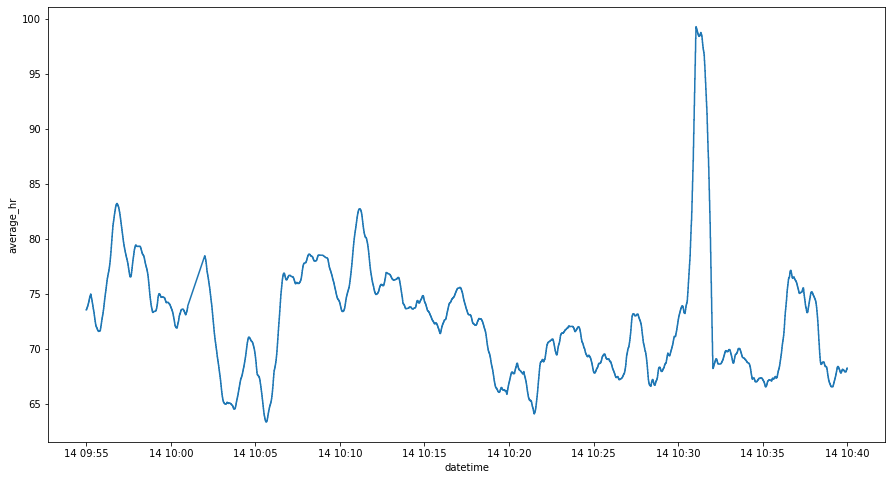

In [165]:
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(x=df6.index, y='average_hr', data=df6,ax=ax)

In [168]:
df6.head()

,acc_x,acc_y,acc_z,datetime,average_hr,new_temp,new_bvp,new_eda,label
datetime,,,,,,,,,
2022-02-14 09:55:00.000000,-11.0,-10.0,62.0,2022-02-14 09:55:00.000000,73.53,28.55,3.20,0.229358,1
2022-02-14 09:55:00.031250,-11.0,-11.0,62.0,2022-02-14 09:55:00.031250,73.53,28.55,0.04,0.229358,1
2022-02-14 09:55:00.062500,-12.0,-11.0,62.0,2022-02-14 09:55:00.062500,73.53,28.55,-5.05,0.229358,1
2022-02-14 09:55:00.093750,-12.0,-11.0,62.0,2022-02-14 09:55:00.093750,73.53,28.55,-10.22,0.229358,1
2022-02-14 09:55:00.125000,-11.0,-10.0,62.0,2022-02-14 09:55:00.125000,73.53,28.55,-13.84,0.229358,1


## Check Normality

array([[<AxesSubplot:title={'center':'acc_x'}>,
        <AxesSubplot:title={'center':'acc_y'}>,
        <AxesSubplot:title={'center':'acc_z'}>],
       [<AxesSubplot:title={'center':'average_hr'}>,
        <AxesSubplot:title={'center':'new_temp'}>,
        <AxesSubplot:title={'center':'new_bvp'}>],
       [<AxesSubplot:title={'center':'new_eda'}>,
        <AxesSubplot:title={'center':'label'}>, <AxesSubplot:>]],
      dtype=object)

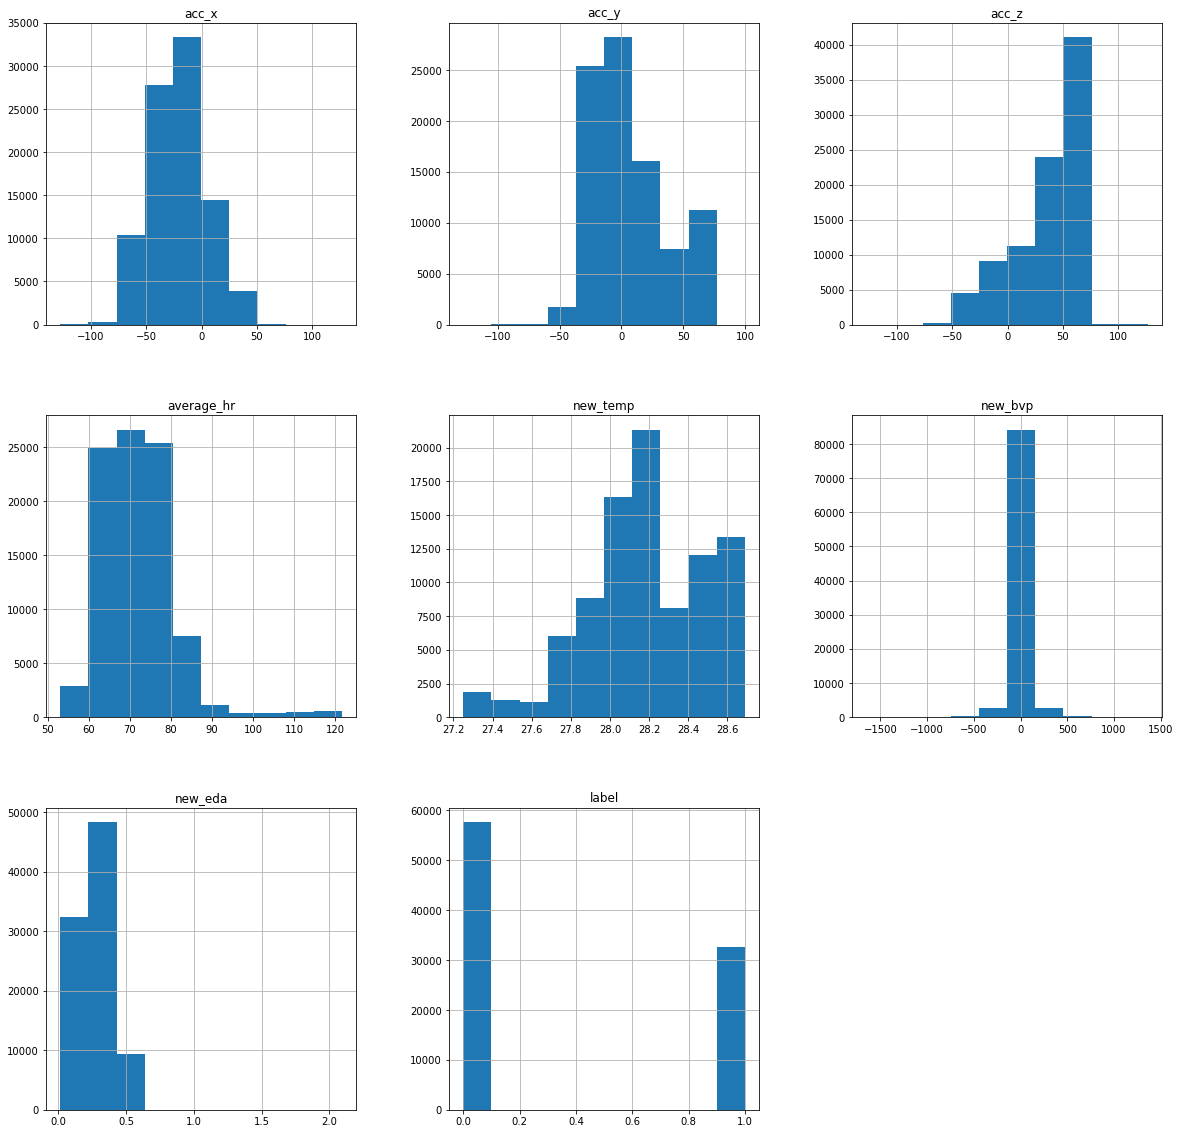

In [169]:
df.hist(figsize=(20,20))

array([[<AxesSubplot:title={'center':'acc_x'}>,
        <AxesSubplot:title={'center':'acc_y'}>,
        <AxesSubplot:title={'center':'acc_z'}>],
       [<AxesSubplot:title={'center':'average_hr'}>,
        <AxesSubplot:title={'center':'new_temp'}>,
        <AxesSubplot:title={'center':'new_bvp'}>],
       [<AxesSubplot:title={'center':'new_eda'}>,
        <AxesSubplot:title={'center':'label'}>, <AxesSubplot:>]],
      dtype=object)

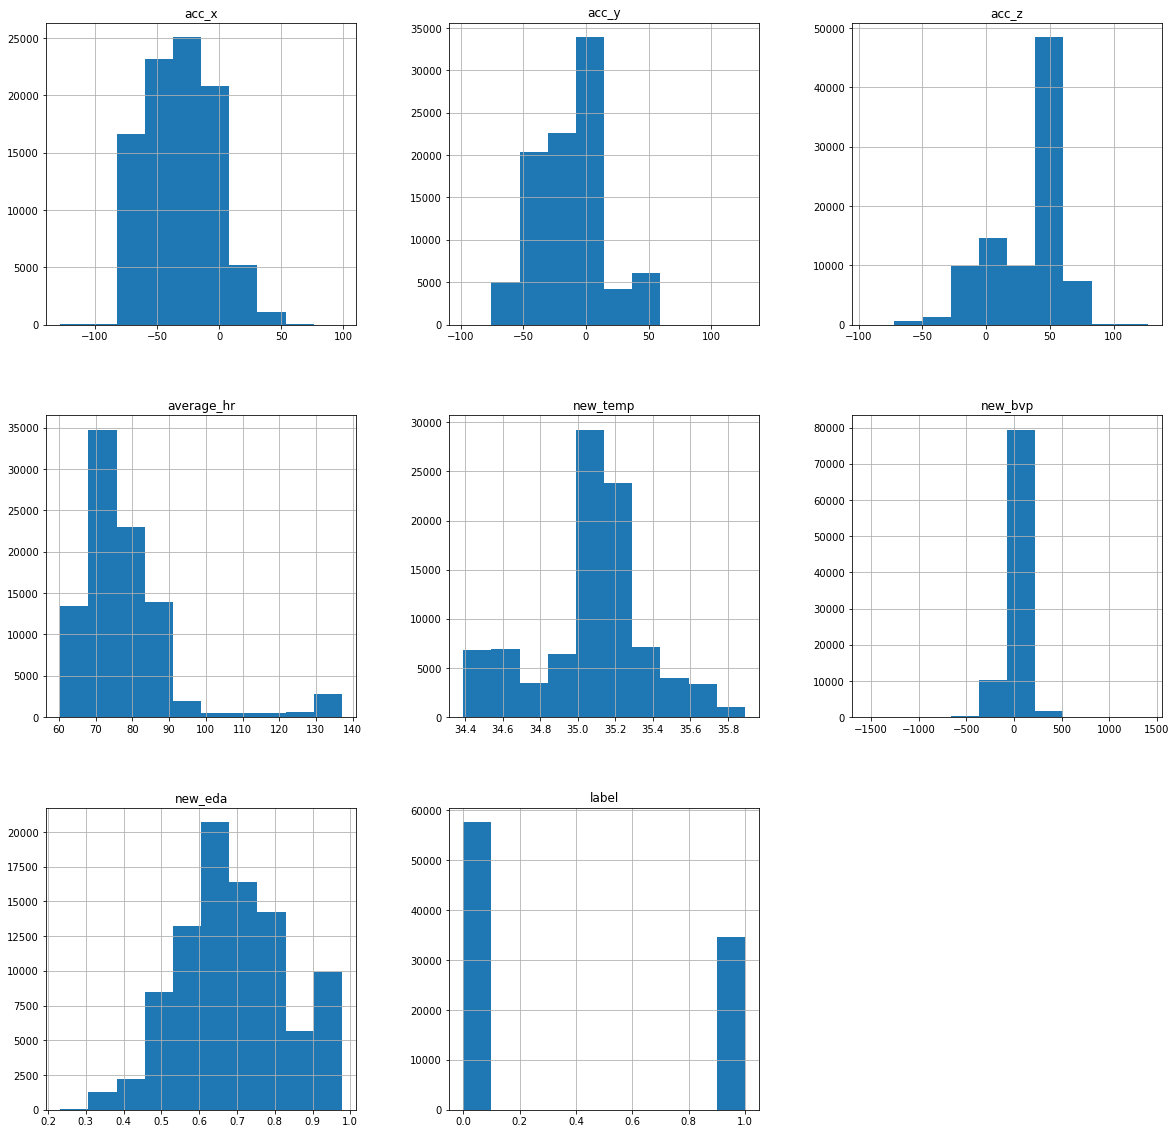

In [222]:
df2.hist(figsize=(20,20))

array([[<AxesSubplot:title={'center':'acc_x'}>,
        <AxesSubplot:title={'center':'acc_y'}>,
        <AxesSubplot:title={'center':'acc_z'}>],
       [<AxesSubplot:title={'center':'average_hr'}>,
        <AxesSubplot:title={'center':'new_temp'}>,
        <AxesSubplot:title={'center':'new_bvp'}>],
       [<AxesSubplot:title={'center':'new_eda'}>,
        <AxesSubplot:title={'center':'label'}>, <AxesSubplot:>]],
      dtype=object)

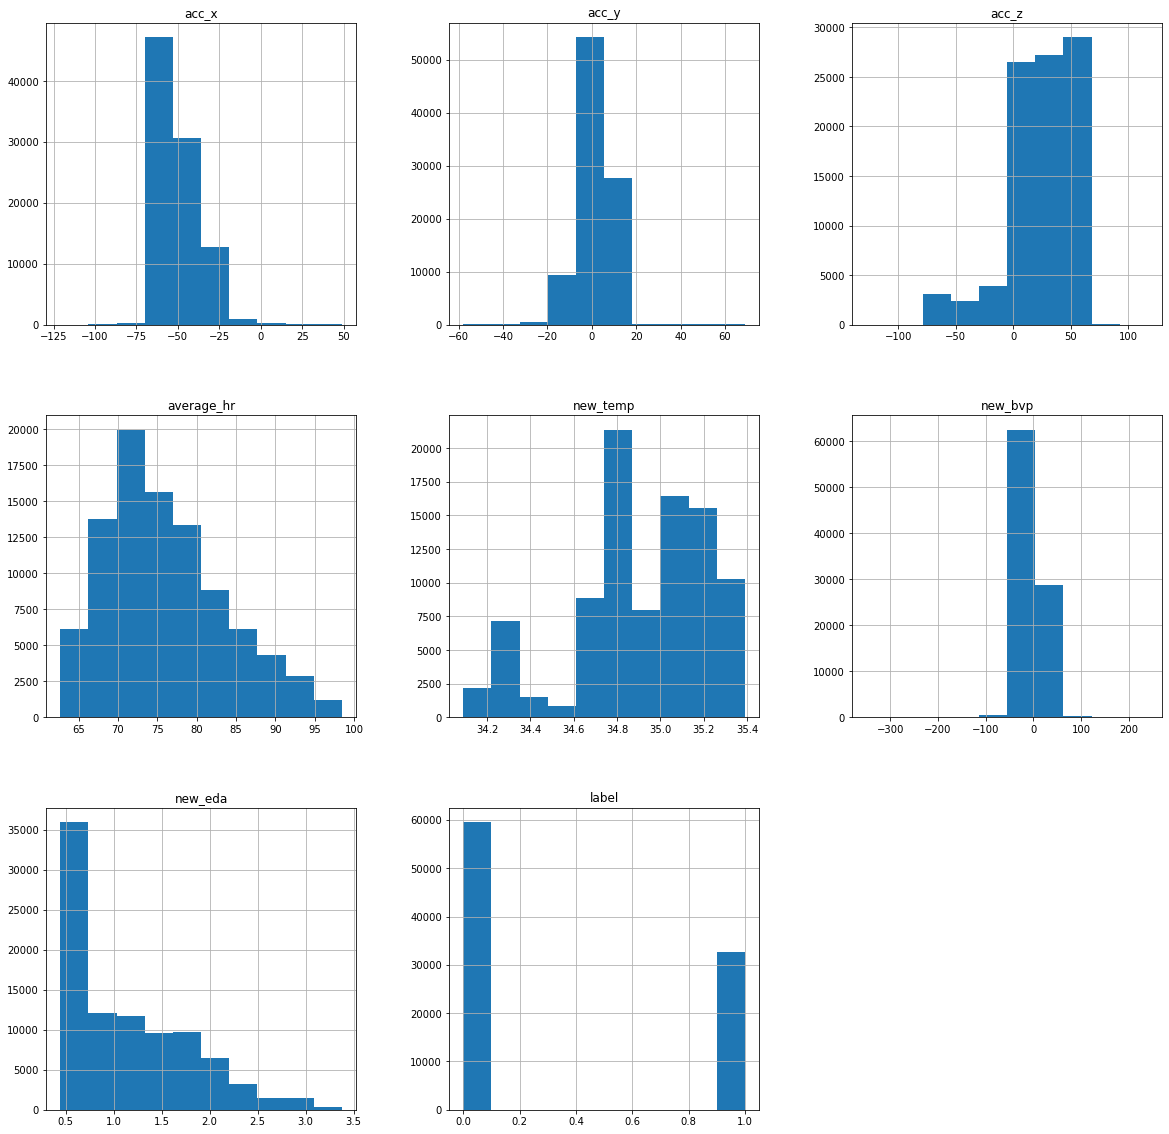

In [223]:
df4.hist(figsize=(20,20))

array([[<AxesSubplot:title={'center':'acc_x'}>,
        <AxesSubplot:title={'center':'acc_y'}>,
        <AxesSubplot:title={'center':'acc_z'}>],
       [<AxesSubplot:title={'center':'average_hr'}>,
        <AxesSubplot:title={'center':'new_temp'}>,
        <AxesSubplot:title={'center':'new_bvp'}>],
       [<AxesSubplot:title={'center':'new_eda'}>,
        <AxesSubplot:title={'center':'label'}>, <AxesSubplot:>]],
      dtype=object)

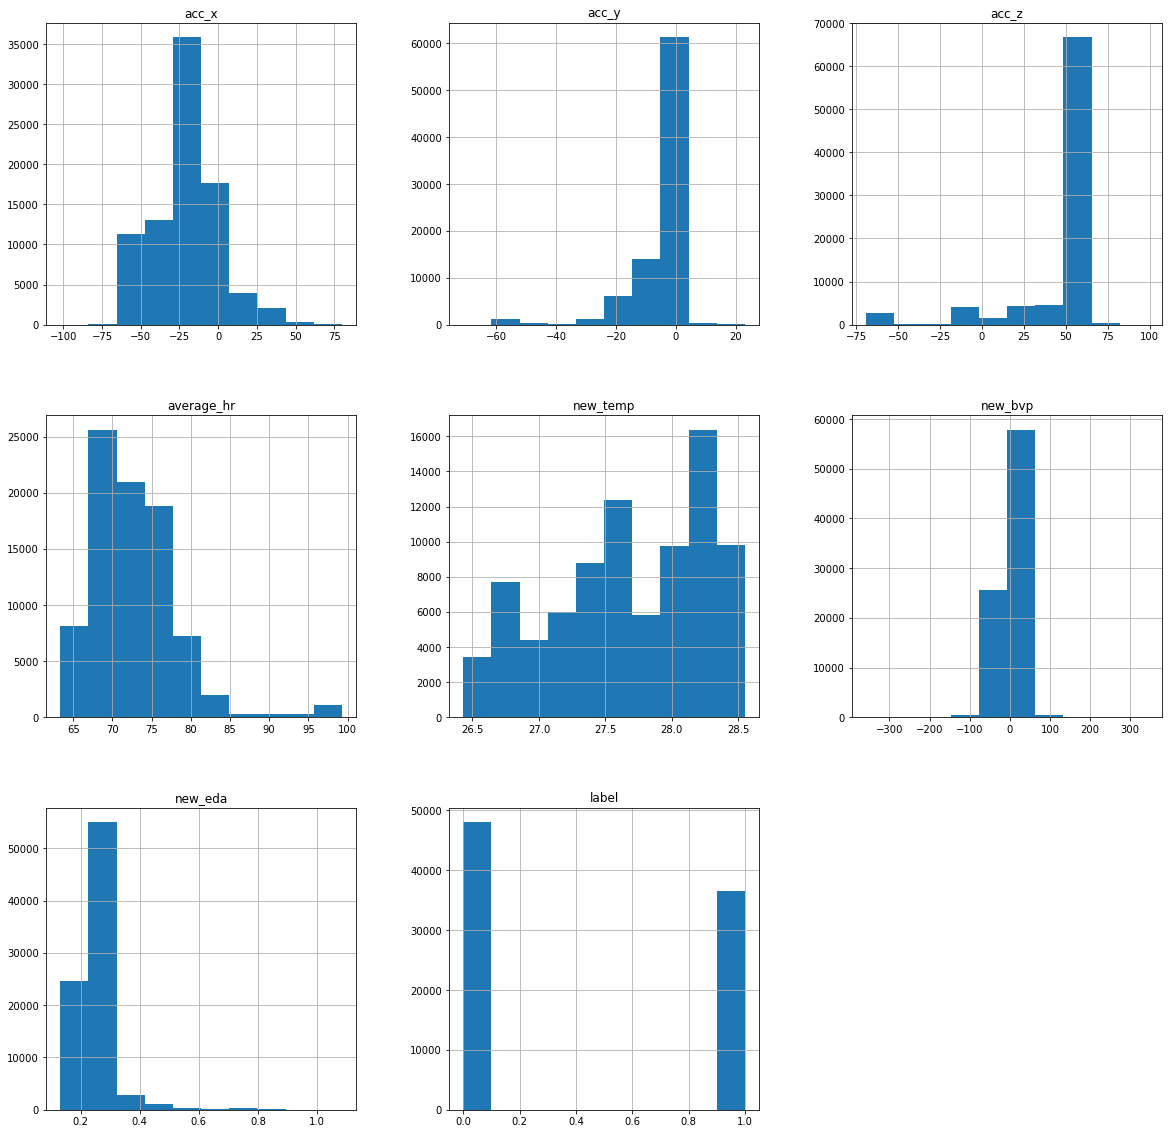

In [225]:
df6.hist(figsize=(20,20))

## Check distribution along with outliers 

<AxesSubplot:>

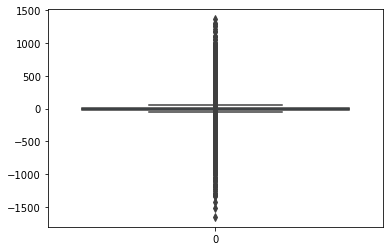

In [171]:
sns.boxplot(data=df['new_bvp'])

<AxesSubplot:>

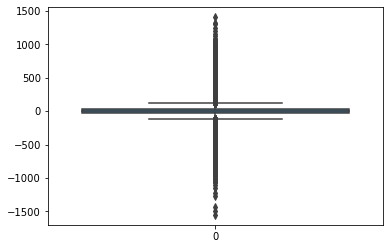

In [226]:
sns.boxplot(data=df2['new_bvp'])

[Text(0.5, 0, 'BVP')]

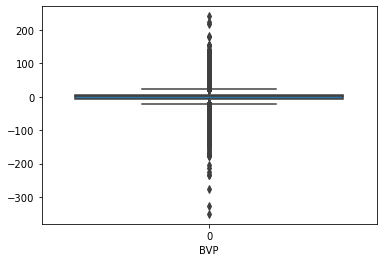

In [234]:
ax = sns.boxplot(data=df4['new_bvp'])
ax.set(xlabel='BVP')

[Text(0.5, 0, 'Hearbeat Rate')]

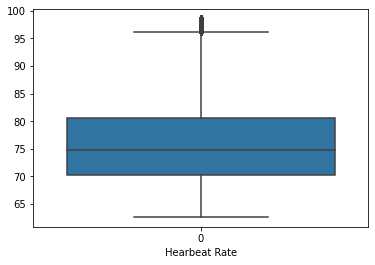

In [235]:
ax = sns.boxplot(data=df4['average_hr'])
ax.set(xlabel='Hearbeat Rate')

<AxesSubplot:>

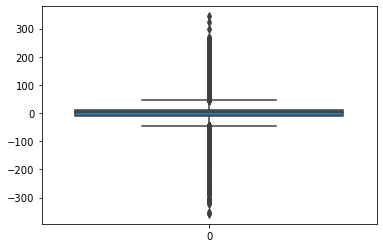

In [228]:
sns.boxplot(data=df6['new_bvp'])

Lets show the correlation between label and the other predictor variables

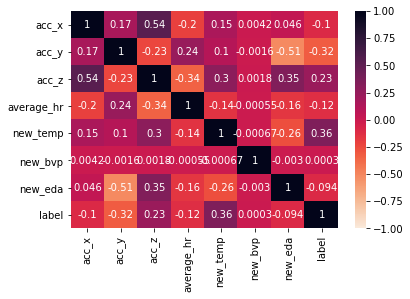

In [247]:
sns.heatmap(df.corr(), vmin=-1, vmax=1,
annot=True,cmap="rocket_r")
plt.show()

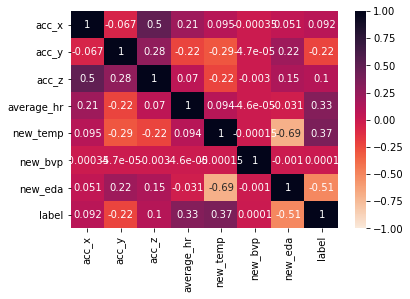

In [248]:
sns.heatmap(df2.corr(), vmin=-1, vmax=1,
annot=True,cmap="rocket_r")
plt.show()

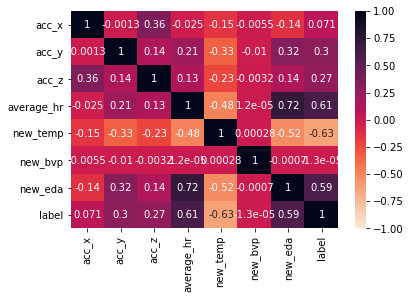

In [249]:
sns.heatmap(df4.corr(), vmin=-1, vmax=1,
annot=True,cmap="rocket_r")
plt.show()

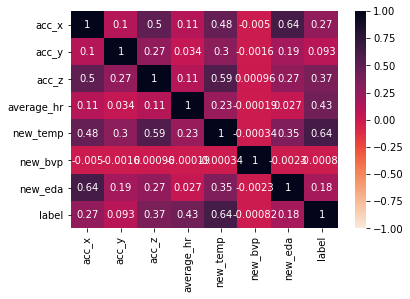

In [250]:
sns.heatmap(df6.corr(), vmin=-1, vmax=1,
annot=True,cmap="rocket_r")
plt.show()

The heatmap for the four datasets shows that blood volume pulse (bvp) is not a good indicator of stress.  It is barely correlated to our response variable

# Model Building

For our modelling, we will combine participants 01, 02 and 04 as one dataset, with which we will also create train and test set from. We will keep participant 06 as further data to test with. ~

In [177]:
df.reset_index(inplace=True,drop=True)
df2.reset_index(inplace=True,drop=True)
df4.reset_index(inplace=True,drop=True)
df6.reset_index(inplace=True,drop=True)

In [181]:
df.to_csv('df.csv', index=False)
df2.to_csv('df2.csv', index=False)
df4.to_csv('df4.csv', index=False)
df6.to_csv('df6.csv', index=False)

In [182]:
df.drop(columns=['datetime'],inplace=True)
df2.drop(columns=['datetime'],inplace=True)
df4.drop(columns=['datetime'],inplace=True)
df6.drop(columns=['datetime'],inplace=True)

In [251]:
#we'll drop bvp because it is weakly correlated to the 'label' column
df.drop(columns=['new_bvp'],inplace=True)
df2.drop(columns=['new_bvp'],inplace=True)
df4.drop(columns=['new_bvp'],inplace=True)
df6.drop(columns=['new_bvp'],inplace=True)

In [252]:
df.head()

,acc_x,acc_y,acc_z,average_hr,new_temp,new_eda,label
0,-15.0,17.0,59.0,74.35,28.53,0.189626,1
1,-15.0,16.0,59.0,74.35,28.53,0.189626,1
2,-15.0,16.0,60.0,74.35,28.53,0.189626,1
3,-16.0,16.0,59.0,74.35,28.53,0.189626,1
4,-14.0,16.0,60.0,74.35,28.53,0.189626,1


In [253]:
df_ml = pd.concat([df, df2, df4])
df_ml.shape

(274565, 7)

In [254]:
X = df_ml.iloc[:,:-1]
y =df_ml['label']

In [255]:
X6 = df6.iloc[:,:-1]
y6 =df6['label']

### Random Forest Model

In [256]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Create the random forest classifier with 100 trees
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=45)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9995083131498916


Confusion matrix plot

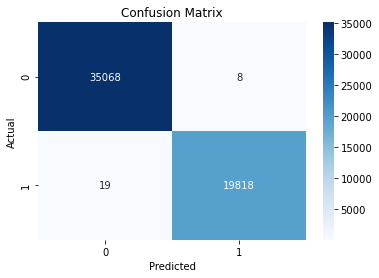

In [257]:
# calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

In [290]:
#predict completely unknown data
y_pred6 = rf_classifier.predict(X6)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y6, y_pred6)
print("Accuracy:", accuracy)

Accuracy: 0.5812431197547377


#confusion matrix plot for completely new data

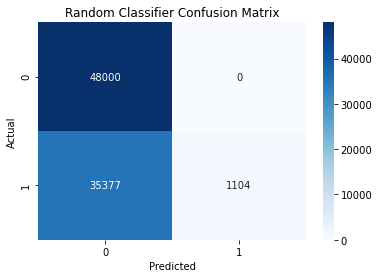

In [292]:
# calculate the confusion matrix
cm = confusion_matrix(y6, y_pred6)

# plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Classifier Confusion Matrix')

plt.show()

lets improve the performance of our random forest classifier model, using grid search and 5 fold cross validation

In [260]:

# we define parameter grid for grid search
param_grid = {'n_estimators': [100, 200, 300], 
              'max_depth': [5, 10, None], 
              'min_samples_split': [2, 5, 10], 
              'min_samples_leaf': [1, 2, 4]}

# we implement grid search using 5-fold cross validation
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# print best parameters and score
print('Best Parameters: ', grid_search.best_params_,'Best Score: ', grid_search.best_score_)


# we fit the random forest model with the best possible parameters 
best_rf = RandomForestClassifier(random_state=52, n_estimators=grid_search.best_params_['n_estimators'], 
                                 max_depth=grid_search.best_params_['max_depth'],
                                 min_samples_split=grid_search.best_params_['min_samples_split'], 
                                 min_samples_leaf=grid_search.best_params_['min_samples_leaf'])
best_rf.fit(X_train, y_train)

# predict on testing set
y_pred = best_rf.predict(X_test)

# evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

# perform 5-fold cross validation on final model and calculate mean accuracy
cv_scores = cross_val_score(best_rf, X, y, cv=5)
mean_accuracy = np.mean(cv_scores)
print('Mean CV Accuracy: ', mean_accuracy)



Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300} Best Score:  0.9993853914372881
Accuracy:  0.999562945022126
Mean CV Accuracy:  0.5008504361444467


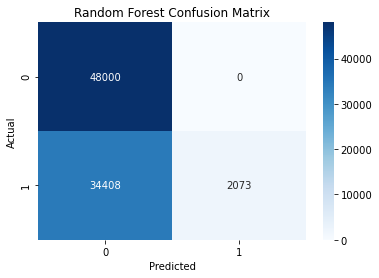

In [287]:
#lets test the performance
y_pred6 = best_rf.predict(X6)

# confusion_matrix(y6,y_pred6)
# calculate the confusion matrix
cm = confusion_matrix(y6, y_pred6)

# plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')

plt.show()

In [288]:
accuracy = accuracy_score(y6, y_pred6)
print('Accuracy: ', accuracy)

Accuracy:  0.5927131544370924


In [289]:
print(classification_report(y6,y_pred6))

              precision    recall  f1-score   support

           0       0.58      1.00      0.74     48000
           1       1.00      0.06      0.11     36481

    accuracy                           0.59     84481
   macro avg       0.79      0.53      0.42     84481
weighted avg       0.76      0.59      0.46     84481



## Decision Trees Model

In [263]:
#create decision tree classifier object
clf = DecisionTreeClassifier()
#fit model using training set
clf = clf.fit(X_train,y_train)

In [264]:
#obtain prediction from decision tree classifier model
predictclf = clf.predict(X_test)

In [265]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

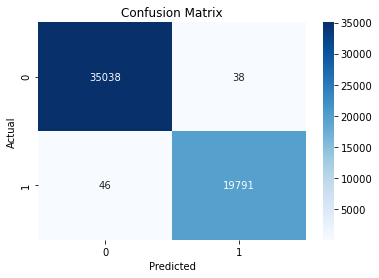

In [266]:
#lets test initial performance
confusion_matrix(y_test,predictclf)
# calculate the confusion matrix
cm = confusion_matrix(y_test, predictclf)

# plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

In [267]:
accuracy_score(y_test,predictclf)

0.9984703075774407

In [269]:
#test performance with completely unseen data
y_pred6 = clf.predict(X6)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y6, y_pred6)
print("Accuracy:", accuracy)

Accuracy: 0.6086812419360567


In [270]:
#lets implement pruning to make sure our decision tree isn't overfitting
# prune the tree using ccp_alpha
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=52, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
# get optimal value of ccp_alpha using cross-validation

scores = [cross_val_score(clf, X_train, y_train, cv=5).mean() for clf in clfs]
optimal_alpha = ccp_alphas[np.argmax(scores)]
print('Optimal ccp_alpha:', optimal_alpha)

# retrain the classifier with the best value of ccp_alpha and implement 5 fold cross validation
clf = DecisionTreeClassifier(random_state=52, ccp_alpha=optimal_alpha)
clf.fit(X_train, y_train)

# perform 5-fold cross validation on final model and calculate mean accuracy
cv_scores = cross_val_score(clf, X, y, cv=5)
mean_accuracy = np.mean(cv_scores)
print('Mean CV Accuracy: ', mean_accuracy)

# evaluate the classifier on the testing data once more
print('Accuracy after pruning:', clf.score(X_test, y_test))

Optimal ccp_alpha: 4.550076611012084e-06
Mean CV Accuracy:  0.5013057017463989
Accuracy after pruning: 0.9984885182015187


In [282]:
#The important one!, implementing on untested data
#test performance with completely unseen data
y_pred6 = clf.predict(X6)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y6, y_pred6)
print("Accuracy:", accuracy)

Accuracy: 0.5552491092671725


In [283]:
print(classification_report(y6,y_pred6))

              precision    recall  f1-score   support

           0       0.57      0.92      0.70     48000
           1       0.42      0.07      0.13     36481

    accuracy                           0.56     84481
   macro avg       0.49      0.50      0.41     84481
weighted avg       0.50      0.56      0.45     84481



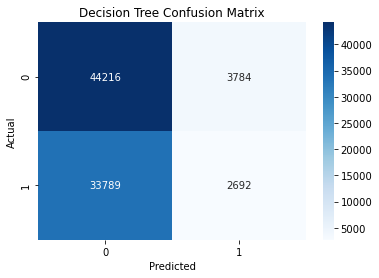

In [273]:

# calculate the confusion matrix
cm = confusion_matrix(y6,y_pred6)

# plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')

plt.show()

## Logistic regression classifier Model

In [274]:
# define logistic regression model
log_reg = LogisticRegression(random_state=52)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=52)

In [275]:
# predict on testing set
y_pred = log_reg.predict(X_test)

# evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)


Accuracy:  0.6963196328738186


In [276]:
# predict on participant 06 data
y_pred6 = log_reg.predict(X6)

# evaluate model performance
accuracy = accuracy_score(y6, y_pred6)
print('Accuracy: ', accuracy)


Accuracy:  0.8291095039121222


In [277]:

# define parameter grid for grid search
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
# we implement grid search using 5-fold cross validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
# print best parameters and score
print('Best Parameters: ', grid_search.best_params_,'Best Score: ',grid_search.best_score_)


# fit the logistic regression model with best parameters
best_log_reg = LogisticRegression(random_state=52, C=grid_search.best_params_['C'], penalty=grid_search.best_params_['penalty'])
best_log_reg.fit(X_train, y_train)

# predict on testing set
y_pred = best_log_reg.predict(X_test)

# evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

# perform 5-fold cross validation on final model and calculate mean accuracy
cv_scores = cross_val_score(best_log_reg, X, y, cv=5)
mean_accuracy = np.mean(cv_scores)
print('Mean CV Accuracy: ', mean_accuracy)

Best Parameters:  {'C': 1, 'penalty': 'l2'} Best Score:  0.6970252973587086
Accuracy:  0.6963196328738186
Mean CV Accuracy:  0.587736965745816


In [278]:
print('Accuracy with unseen data:', best_log_reg.score(X6, y6))

Accuracy with unseen data: 0.8291095039121222


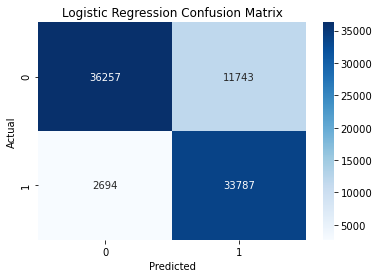

In [284]:
#lets test initial performance
y_pred6 = best_log_reg.predict(X6)

# confusion_matrix(y6,y_pred6)
# calculate the confusion matrix
cm = confusion_matrix(y6, y_pred6)

# plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')

plt.show()

In [285]:
print(classification_report(y6,y_pred6))

              precision    recall  f1-score   support

           0       0.93      0.76      0.83     48000
           1       0.74      0.93      0.82     36481

    accuracy                           0.83     84481
   macro avg       0.84      0.84      0.83     84481
weighted avg       0.85      0.83      0.83     84481

